In [1]:
import os

import pandas as pd

import common

# Assign notebook and folder names
notebook_name = '005_bokeh_dimensionality_reduction'
figure_folder = os.path.join(common.FIGURE_FOLDER, notebook_name)
data_folder = os.path.join(common.DATA_FOLDER, notebook_name)
print('Figure folder:', figure_folder)
print('Data folder:', data_folder)

# Make the folders
! mkdir -p $figure_folder
! mkdir -p $data_folder

Figure folder: /Users/olgabot/code/maca/figures/005_bokeh_dimensionality_reduction
Data folder: /Users/olgabot/code/maca/data/005_bokeh_dimensionality_reduction


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"


In [4]:
cd /Users/olgabot/Google Drive/MACA/

/Users/olgabot/Google Drive/MACA


In [26]:
ls -lh combined_tables/

total 328784
-rw-r--r--@ 1 olgabot  staff     0B Jun 12 09:46 Icon?
-r-xr-xr-x  1 olgabot  staff   364K Jun 20 11:14 cell_metadata.csv*
-r-xr-xr-x  1 olgabot  staff    92M May 31 08:41 concatenated_data_all.txt*
-r-xr-xr-x  1 olgabot  staff   455K May 31 08:41 concatenated_ercc_all.txt*
-r-xr-xr-x  1 olgabot  staff   687K May 31 08:41 concatenated_metadata_all.txt*
-r-xr-xr-x  1 olgabot  staff    88K May 31 08:41 concatenated_stats_all.txt*
-r-xr-xr-x  1 olgabot  staff    67M Jun 21 09:15 processed_and_filtered_data_raw.csv*


In [5]:
expression = pd.read_table('combined_tables/concatenated_data_all.txt', sep='\s+')
print(expression.shape)
expression.head()

(23433, 1920)


,A17-MAA000099-MAA_S1-1,C22-MAA000099-MAA_S1-1,F6-MAA000099-MAA_S1-1,H10-MAA000099-MAA_S1-1,J15-MAA000099-MAA_S1-1,L21-MAA000099-MAA_S1-1,O4-MAA000099-MAA_S1-1,A12-MAA000072-MAA_S1-1,B19-MAA000099-MAA_S1-1,E4-MAA000099-MAA_S1-1,...,G16-MAA000014-MAA_S1-1,J2-MAA000014-MAA_S1-1,J1-MAA000089-MAA_S1-1,L9-MAA000089-MAA_S1-1,N16-MAA000089-MAA_S1-1,A8-MAA000014-MAA_S1-1,D3-MAA000014-MAA_S1-1,F13-MAA000014-MAA_S1-1,H20-MAA000014-MAA_S1-1,K6-MAA000014-MAA_S1-1
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,158,0,257,0,0,67,0,0,0,0,...,189,10,0,3,0,103,76,24,51,3
0610007L01Rik,0,19,0,0,267,158,35,0,0,1,...,53,5,1,0,426,129,11,1,5,0
0610007N19Rik,0,0,0,0,0,0,0,0,80,0,...,0,4,0,0,0,0,0,0,5,0
0610007P08Rik,0,0,94,0,0,0,0,0,11,26,...,0,0,0,0,1,2,6,0,0,0


In [6]:
expression_nonzero = expression.loc[~(expression == 0).all(axis=1)]
print(expression_nonzero.shape)
expression_nonzero.head()

(19284, 1920)


,A17-MAA000099-MAA_S1-1,C22-MAA000099-MAA_S1-1,F6-MAA000099-MAA_S1-1,H10-MAA000099-MAA_S1-1,J15-MAA000099-MAA_S1-1,L21-MAA000099-MAA_S1-1,O4-MAA000099-MAA_S1-1,A12-MAA000072-MAA_S1-1,B19-MAA000099-MAA_S1-1,E4-MAA000099-MAA_S1-1,...,G16-MAA000014-MAA_S1-1,J2-MAA000014-MAA_S1-1,J1-MAA000089-MAA_S1-1,L9-MAA000089-MAA_S1-1,N16-MAA000089-MAA_S1-1,A8-MAA000014-MAA_S1-1,D3-MAA000014-MAA_S1-1,F13-MAA000014-MAA_S1-1,H20-MAA000014-MAA_S1-1,K6-MAA000014-MAA_S1-1
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,158,0,257,0,0,67,0,0,0,0,...,189,10,0,3,0,103,76,24,51,3
0610007L01Rik,0,19,0,0,267,158,35,0,0,1,...,53,5,1,0,426,129,11,1,5,0
0610007N19Rik,0,0,0,0,0,0,0,0,80,0,...,0,4,0,0,0,0,0,0,5,0
0610007P08Rik,0,0,94,0,0,0,0,0,11,26,...,0,0,0,0,1,2,6,0,0,0


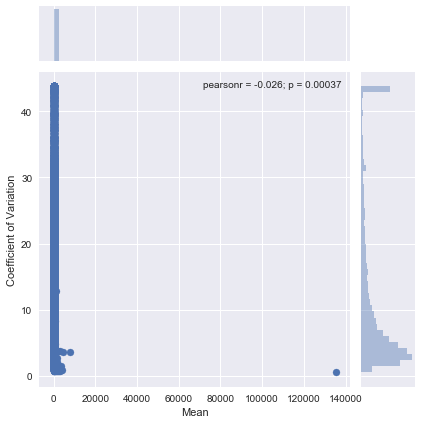

In [7]:
def cvplot(data):
    """Plot mean of data vs coefficient of variation"""
    mean = data.mean(axis=1)
    std = data.std(axis=1)

    cv = std/mean
    cv.name = 'Coefficient of Variation'
    mean.name = 'Mean'

    return sns.jointplot(mean, cv)

g = cvplot(expression_nonzero)

In [8]:
log_expression = np.log10(expression_nonzero+1)

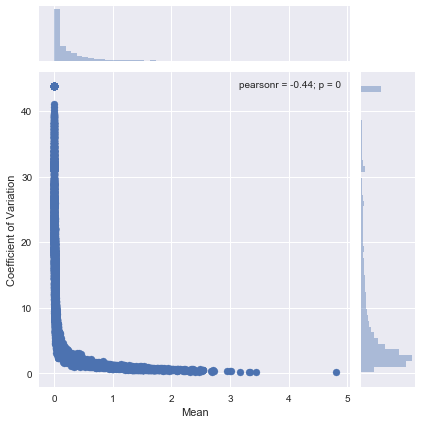

In [9]:
g = cvplot(log_expression)

In [10]:
ranks = expression_nonzero.rank(ascending=False)
print(ranks.shape)
ranks.head()

(19284, 1920)


,A17-MAA000099-MAA_S1-1,C22-MAA000099-MAA_S1-1,F6-MAA000099-MAA_S1-1,H10-MAA000099-MAA_S1-1,J15-MAA000099-MAA_S1-1,L21-MAA000099-MAA_S1-1,O4-MAA000099-MAA_S1-1,A12-MAA000072-MAA_S1-1,B19-MAA000099-MAA_S1-1,E4-MAA000099-MAA_S1-1,...,G16-MAA000014-MAA_S1-1,J2-MAA000014-MAA_S1-1,J1-MAA000089-MAA_S1-1,L9-MAA000089-MAA_S1-1,N16-MAA000089-MAA_S1-1,A8-MAA000014-MAA_S1-1,D3-MAA000014-MAA_S1-1,F13-MAA000014-MAA_S1-1,H20-MAA000014-MAA_S1-1,K6-MAA000014-MAA_S1-1
0610005C13Rik,10386.5,11023.5,11472.5,10891.5,10957.5,12693.5,10861.0,9654.5,10936.5,10491.5,...,12312.5,11849.5,11634.0,10771.0,10333.5,12107.0,12233.5,11542.5,12138.0,10512.5
0610007C21Rik,600.0,11023.5,424.0,10891.5,10957.5,2897.5,10861.0,9654.5,10936.5,10491.5,...,367.0,2498.5,11634.0,1472.5,10333.5,499.5,1045.0,900.0,404.5,401.5
0610007L01Rik,10386.5,2150.5,11472.5,10891.5,535.5,1314.0,1721.5,9654.5,10936.5,1657.0,...,2200.5,3150.5,3908.5,10771.0,383.0,341.5,3637.0,3551.0,3608.5,10512.5
0610007N19Rik,10386.5,11023.5,11472.5,10891.5,10957.5,12693.5,10861.0,9654.5,1286.5,10491.5,...,12312.5,3321.5,11634.0,10771.0,10333.5,12107.0,12233.5,11542.5,3608.5,10512.5
0610007P08Rik,10386.5,11023.5,1673.0,10891.5,10957.5,12693.5,10861.0,9654.5,2121.5,1301.0,...,12312.5,11849.5,11634.0,10771.0,1344.5,4498.5,4108.0,11542.5,12138.0,10512.5


In [11]:
is_top_gene = (ranks < 50).any(axis=1)
is_top_gene.sum()

4405

In [12]:
top_genes = expression_nonzero[is_top_gene].dropna(how='all')
print(top_genes.shape)
top_genes.head()

(4405, 1920)


,A17-MAA000099-MAA_S1-1,C22-MAA000099-MAA_S1-1,F6-MAA000099-MAA_S1-1,H10-MAA000099-MAA_S1-1,J15-MAA000099-MAA_S1-1,L21-MAA000099-MAA_S1-1,O4-MAA000099-MAA_S1-1,A12-MAA000072-MAA_S1-1,B19-MAA000099-MAA_S1-1,E4-MAA000099-MAA_S1-1,...,G16-MAA000014-MAA_S1-1,J2-MAA000014-MAA_S1-1,J1-MAA000089-MAA_S1-1,L9-MAA000089-MAA_S1-1,N16-MAA000089-MAA_S1-1,A8-MAA000014-MAA_S1-1,D3-MAA000014-MAA_S1-1,F13-MAA000014-MAA_S1-1,H20-MAA000014-MAA_S1-1,K6-MAA000014-MAA_S1-1
0610007C21Rik,158,0,257,0,0,67,0,0,0,0,...,189,10,0,3,0,103,76,24,51,3
0610007L01Rik,0,19,0,0,267,158,35,0,0,1,...,53,5,1,0,426,129,11,1,5,0
0610007P14Rik,0,0,47,0,0,21,0,0,0,0,...,8,0,0,0,0,0,3,0,0,0
0610009D07Rik,0,112,99,0,0,16,0,0,0,0,...,31,6,0,0,0,48,116,9,13,2
0610010F05Rik,0,105,122,0,0,0,0,0,0,0,...,0,1,54,0,0,0,11,0,0,0


In [13]:
top_genes_ranks = ranks.loc[is_top_gene]

In [14]:
%time correls = top_genes_ranks.corr(method='pearson')
correls.head()

CPU times: user 21 s, sys: 31.2 ms, total: 21 s
Wall time: 21 s


,A17-MAA000099-MAA_S1-1,C22-MAA000099-MAA_S1-1,F6-MAA000099-MAA_S1-1,H10-MAA000099-MAA_S1-1,J15-MAA000099-MAA_S1-1,L21-MAA000099-MAA_S1-1,O4-MAA000099-MAA_S1-1,A12-MAA000072-MAA_S1-1,B19-MAA000099-MAA_S1-1,E4-MAA000099-MAA_S1-1,...,G16-MAA000014-MAA_S1-1,J2-MAA000014-MAA_S1-1,J1-MAA000089-MAA_S1-1,L9-MAA000089-MAA_S1-1,N16-MAA000089-MAA_S1-1,A8-MAA000014-MAA_S1-1,D3-MAA000014-MAA_S1-1,F13-MAA000014-MAA_S1-1,H20-MAA000014-MAA_S1-1,K6-MAA000014-MAA_S1-1
A17-MAA000099-MAA_S1-1,1.000000,0.402806,0.204992,0.415496,0.412236,0.366338,0.424842,0.074729,0.388319,0.389216,...,0.209776,0.187394,0.235269,0.197596,0.238994,0.168935,0.211566,0.177555,0.192833,0.166623
C22-MAA000099-MAA_S1-1,0.402806,1.000000,0.231346,0.508106,0.498441,0.495812,0.513208,0.060538,0.493488,0.466863,...,0.232451,0.214565,0.309903,0.244100,0.265233,0.195502,0.233106,0.191455,0.228407,0.162869
F6-MAA000099-MAA_S1-1,0.204992,0.231346,1.000000,0.227376,0.238173,0.288354,0.224137,0.062272,0.233401,0.231421,...,0.349310,0.304683,0.305268,0.207555,0.204024,0.330051,0.338154,0.295917,0.347583,0.253859
H10-MAA000099-MAA_S1-1,0.415496,0.508106,0.227376,1.000000,0.497883,0.481161,0.483166,0.067580,0.488877,0.432727,...,0.235457,0.200023,0.295084,0.239302,0.259765,0.211482,0.240855,0.195536,0.227952,0.161382
J15-MAA000099-MAA_S1-1,0.412236,0.498441,0.238173,0.497883,1.000000,0.466375,0.454974,0.064933,0.478746,0.429144,...,0.244531,0.234306,0.300258,0.224231,0.255093,0.223422,0.252523,0.194643,0.231866,0.157559


In [15]:
from sklearn.manifold import TSNE

smusher = TSNE(random_state=2017)
%time smushed = pd.DataFrame(smusher.fit_transform(correls), index=correls.index)
smushed.head()

CPU times: user 21.6 s, sys: 1.63 s, total: 23.3 s
Wall time: 22.6 s


,0,1
A17-MAA000099-MAA_S1-1,-10.521070,9.815325
C22-MAA000099-MAA_S1-1,-11.540132,-2.938286
F6-MAA000099-MAA_S1-1,4.194320,4.882576
H10-MAA000099-MAA_S1-1,-11.223955,1.552095
J15-MAA000099-MAA_S1-1,-11.284926,1.738442


In [28]:
smushed.to_csv(os.path.join(data_folder, 'all.csv'))

In [16]:
input_folder = os.path.join(common.DATA_FOLDER, '000_initial_analysis')
csv = os.path.join(input_folder, 'metadata_tissues.csv')
metadata = pd.read_csv(csv, index_col=0)
print(metadata.shape)
metadata.head()

(1920, 46)


,EXP_ID,TAXON,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,...,date.prepared,data.sorted,tissue,subtissue,Mouse ID (age_#_sex),FACS.selection,nozzle.size,FACS.instument,Experiment ID,tissue_subtissue
A17-MAA000099-MAA_S1-1,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:42:22,May 27 22:42:23,May 27 22:42:40,117.28,553808,150,475672,85.89,...,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem
C22-MAA000099-MAA_S1-1,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:42:34,May 27 22:42:34,May 27 22:42:55,161.41,941561,150,814618,86.52,...,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem
F6-MAA000099-MAA_S1-1,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:46:46,May 27 22:46:46,May 27 22:47:05,166.32,877801,150,790833,90.09,...,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem
H10-MAA000099-MAA_S1-1,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:53:36,May 27 22:53:36,May 27 22:53:57,158.78,926226,150,813374,87.82,...,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem
J15-MAA000099-MAA_S1-1,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:42:19,May 27 22:42:20,May 27 22:42:41,173.82,1013931,150,887192,87.50,...,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem


In [23]:
pd.options.display.max_columns = 50

In [24]:
smushed_metadata = smushed.join(metadata)
print(smushed_metadata.shape)
smushed_metadata.head()

(1920, 48)


,0,1,EXP_ID,TAXON,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,Number of splices: GC/AG,Number of splices: AT/AC,Number of splices: Non-canonical,"Mismatch rate per base, %",Deletion rate per base,Deletion average length,Insertion rate per base,Insertion average length,Number of reads mapped to multiple loci,% of reads mapped to multiple loci,Number of reads mapped to too many loci,% of reads mapped to too many loci,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads,plate,dNTP.batch,oligodT.order.no,plate.type,preparation.site,date.prepared,data.sorted,tissue,subtissue,Mouse ID (age_#_sex),FACS.selection,nozzle.size,FACS.instument,Experiment ID,tissue_subtissue
A17-MAA000099-MAA_S1-1,-10.521070,9.815325,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:42:22,May 27 22:42:23,May 27 22:42:40,117.28,553808,150,475672,85.89,148.42,173663,169696,171835,1419,126,283,0.22,0.04,4.06,0.01,1.06,37712,6.81,3208,0.58,0.11,6.58,0.03,0,0.0,MAA000099,402480/444289,12427002.0,Biorad HSP3841,Biohub,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem
C22-MAA000099-MAA_S1-1,-11.540132,-2.938286,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:42:34,May 27 22:42:34,May 27 22:42:55,161.41,941561,150,814618,86.52,148.65,322295,314678,319401,2552,122,220,0.19,0.03,3.58,0.01,1.07,73229,7.78,6959,0.74,0.11,4.73,0.13,0,0.0,MAA000099,402480/444289,12427002.0,Biorad HSP3841,Biohub,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem
F6-MAA000099-MAA_S1-1,4.194320,4.882576,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:46:46,May 27 22:46:46,May 27 22:47:05,166.32,877801,150,790833,90.09,148.71,292961,285370,290430,1927,196,408,0.22,0.04,3.95,0.01,1.04,46876,5.34,761,0.09,0.12,4.26,0.10,0,0.0,MAA000099,402480/444289,12427002.0,Biorad HSP3841,Biohub,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem
H10-MAA000099-MAA_S1-1,-11.223955,1.552095,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:53:36,May 27 22:53:36,May 27 22:53:57,158.78,926226,150,813374,87.82,148.67,298533,293418,296279,1808,133,313,0.23,0.05,3.99,0.01,1.03,63312,6.84,4336,0.47,0.15,4.65,0.08,0,0.0,MAA000099,402480/444289,12427002.0,Biorad HSP3841,Biohub,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem
J15-MAA000099-MAA_S1-1,-11.284926,1.738442,170524_NB501938_0004_AHM5K3BGX2,mus,May 27 22:42:19,May 27 22:42:20,May 27 22:42:41,173.82,1013931,150,887192,87.50,148.67,327779,321917,324549,2759,131,340,0.22,0.04,3.98,0.01,1.04,68802,6.79,5068,0.50,0.10,5.05,0.06,0,0.0,MAA000099,402480/444289,12427002.0,Biorad HSP3841,Biohub,170515.0,170517,brain,brain stem,24_1_M,neurons,130.0,SIM1,exp1,brain: brain stem


In [25]:
smushed_metadata.to_csv(os.path.join(data_folder, 'smushed_metadata.csv'))

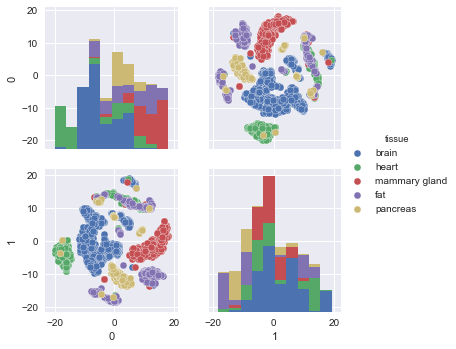

In [36]:
hue = 'tissue'

g = sns.pairplot(smushed_metadata[[0, 1, hue]], hue=hue)
pdf = os.path.join(figure_folder, 'tsne_all.pdf')
g.savefig(pdf)

In [38]:
for tissue, df in metadata.groupby('tissue'):
    print(f'--- {tissue} ---', df.shape)
    data = correls.loc[df.index, df.index]
    
    smusher = TSNE(random_state=2017)
    %time smushed = pd.DataFrame(smusher.fit_transform(data), index=data.index)
    csv = os.path.join(data_folder, f'{tissue}.csv'.replace(' ', '_'))
    smushed.to_csv(csv)
    
    smushed_metadata = smushed.join(metadata)


--- brain --- (710, 46)
CPU times: user 3.64 s, sys: 152 ms, total: 3.79 s
Wall time: 3.22 s
--- fat --- (320, 46)
CPU times: user 1.67 s, sys: 71.8 ms, total: 1.74 s
Wall time: 1.18 s
--- heart --- (339, 46)
CPU times: user 1.73 s, sys: 69.9 ms, total: 1.8 s
Wall time: 1.22 s
--- mammary gland --- (351, 46)
CPU times: user 1.94 s, sys: 76.4 ms, total: 2.01 s
Wall time: 1.44 s
--- pancreas --- (200, 46)
CPU times: user 1.76 s, sys: 77.6 ms, total: 1.84 s
Wall time: 1.27 s


In [37]:
for tissue, df in metadata.groupby('tissue_subtissue'):
    print(f'--- {tissue} ---', df.shape)
    data = correls.loc[df.index, df.index]
    
    smusher = TSNE(random_state=2017)
    %time smushed = pd.DataFrame(smusher.fit_transform(data), index=data.index)
    csv = os.path.join(data_folder, f'{tissue}.csv'.replace(' ', '_'))
    smushed.to_csv(csv)

--- brain: brain stem --- (342, 46)
CPU times: user 1.94 s, sys: 94 ms, total: 2.03 s
Wall time: 1.47 s
--- brain: cortex --- (275, 46)
CPU times: user 2.96 s, sys: 161 ms, total: 3.12 s
Wall time: 2.59 s
--- brain: hippocampus --- (93, 46)
CPU times: user 1.07 s, sys: 43.3 ms, total: 1.11 s
Wall time: 595 ms
--- fat: GAT --- (320, 46)
CPU times: user 1.68 s, sys: 64.9 ms, total: 1.75 s
Wall time: 1.17 s
--- heart: LV --- (339, 46)
CPU times: user 1.73 s, sys: 70.8 ms, total: 1.8 s
Wall time: 1.23 s
--- mammary gland: nan --- (351, 46)
CPU times: user 2.04 s, sys: 97.5 ms, total: 2.14 s
Wall time: 1.61 s
--- pancreas: nan --- (200, 46)
CPU times: user 1.68 s, sys: 68.2 ms, total: 1.75 s
Wall time: 1.18 s


In [19]:
metadata_unique_n = metadata.apply(lambda x: len(x.unique()))
metadata_unique_n.tail(20)

% of reads unmapped: too many mismatches     28
% of reads unmapped: too short              655
% of reads unmapped: other                   33
Number of chimeric reads                      1
% of chimeric reads                           1
plate                                         7
dNTP.batch                                    7
oligodT.order.no                              2
plate.type                                    2
preparation.site                              2
date.prepared                                 2
data.sorted                                   1
tissue                                        5
subtissue                                     6
Mouse ID (age_#_sex)                          1
FACS.selection                                5
nozzle.size                                   2
FACS.instument                                2
Experiment ID                                 1
tissue_subtissue                              7
dtype: int64

In [20]:
palette = sns.color_palette('Set2', n_colors=metadata_unique_n['tissue'])
palette

[(0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 (0.9882352941176471, 0.55294117647058827, 0.3843137254901961),
 (0.55294117647058827, 0.62745098039215685, 0.79607843137254897),
 (0.90588235294117647, 0.54117647058823526, 0.76470588235294112),
 (0.65098039215686276, 0.84705882352941175, 0.32941176470588235)]

In [21]:
tissues = metadata['tissue'].unique()
tissues.sort()
tissues

array(['brain', 'fat', 'heart', 'mammary gland', 'pancreas'], dtype=object)

In [22]:
tissue_to_color = dict(tissues, palette)

TypeError: dict expected at most 1 arguments, got 2

In [ ]:
N = int(1e5)
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]


p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

# output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

In [ ]:
%%file app.py